In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Diabetes.csv')
print(df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


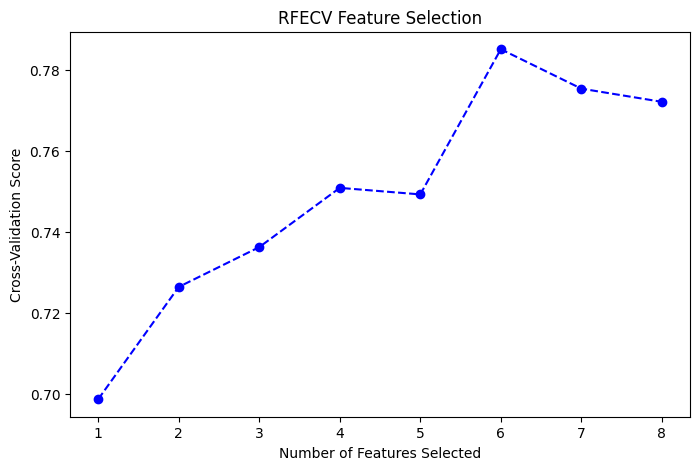

RFE Selected Features: ['glucose', 'diastolic', 'bmi', 'dpf', 'age']
RFECV Selected Features: ['glucose', 'diastolic', 'insulin', 'bmi', 'dpf', 'age']


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV




X = df.drop(columns=['diabetes'])
y = df['diabetes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)


rfe = RFE(model, n_features_to_select=5)  # Select 5 best features
rfe.fit(X_train, y_train)

rfecv = RFECV(model, cv=5)  # Automatically selects best number of features
rfecv.fit(X_train, y_train)


rfe_selected_features = X.columns[rfe.support_]
rfecv_selected_features = X.columns[rfecv.support_]


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o', linestyle='--', color='b')
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Score")
plt.title("RFECV Feature Selection")
plt.show()

print("RFE Selected Features:", list(rfe_selected_features))
print("RFECV Selected Features:", list(rfecv_selected_features))
